# Predict if the cancer is benign or malignant

Let's first import the needed libraries and then the data in

In [1]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

#Import models from scikit learn module:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import metrics
from sklearn.model_selection import KFold

In [37]:
#import data and see the first 5 elements
df = pd.read_csv('../input/breastCancer.csv')

df_All = df #needed later fro scatter plot we keep M and B as diagnosis 
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [38]:
#let's examine how big is our sample
df.shape

(569, 33)

In [39]:
#the last column Unnamed:32 looks wierd lets' examine it
df['Unnamed: 32'].unique()

array([ nan])

In [40]:
#ok last column and id don't look interesting so let's drop 'em
df = df.drop(['Unnamed: 32', 'id'], axis=1)

In [41]:
#turn the diagnosis label to numeric 0=malignant 1=benign
df['diagnosis']= df['diagnosis'].map({'M':0, 'B':1})

df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,0,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,0,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,0,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,0,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [42]:
df.describe()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.627417,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,1.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [43]:
#lets count malignant and benign
df['diagnosis'].value_counts()

1    357
0    212
Name: diagnosis, dtype: int64

In [44]:
#this is a way to read columns names
list(df.columns.values[0:5])

['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean']

In [45]:
#a shortcut to have all names but dont work with slice so method above better
list(df)

['diagnosis',
 'radius_mean',
 'texture_mean',
 'perimeter_mean',
 'area_mean',
 'smoothness_mean',
 'compactness_mean',
 'concavity_mean',
 'concave points_mean',
 'symmetry_mean',
 'fractal_dimension_mean',
 'radius_se',
 'texture_se',
 'perimeter_se',
 'area_se',
 'smoothness_se',
 'compactness_se',
 'concavity_se',
 'concave points_se',
 'symmetry_se',
 'fractal_dimension_se',
 'radius_worst',
 'texture_worst',
 'perimeter_worst',
 'area_worst',
 'smoothness_worst',
 'compactness_worst',
 'concavity_worst',
 'concave points_worst',
 'symmetry_worst',
 'fractal_dimension_worst']

The dataframe basically contains 10 different features :

    a) radius (mean of distances from center to points on the perimeter)
    b) texture (standard deviation of gray-scale values)
    c) perimeter
    d) area
    e) smoothness (local variation in radius lengths)
    f) compactness (perimeter^2 / area - 1.0)
    g) concavity (severity of concave portions of the contour)
    h) concave points (number of concave portions of the contour)
    i) symmetry
    j) fractal dimension ("coastline approximation" - 1)

For each is provided the mean (columns 1 to 10), standard error (11 to 20) and mean of the three largest values(21 to 30)
Column 0 is the output to predict.

Let's plot, for example, the relation between mean radius and diagnosis.

In [46]:
# split dataframe into two different ones based on diagnosis
dfM=df[df['diagnosis'] ==0] #malignant
dfB=df[df['diagnosis'] ==1] #benign
print ('Malignant : ' + str(len(dfM)))
print ('Benign : ' + str(len(dfB)))
print ('Max malignant: ' + str(dfM['radius_mean'].max()))
print ('Max bening: ' + str(dfB['radius_mean'].max()))

Malignant : 212
Benign : 357
Max malignant: 28.11
Max bening: 17.85


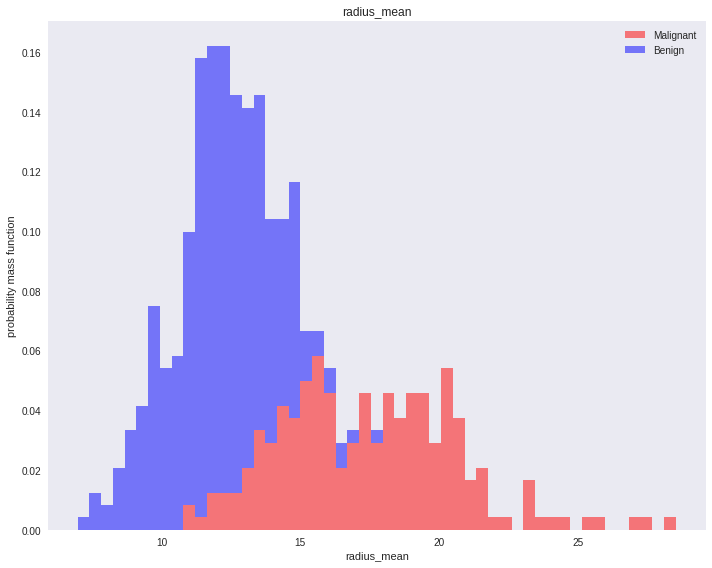

In [47]:
#Stack the data
rm = 'radius_mean'
fig,axes = plt.subplots(figsize=(10,8))
binwidth= (max(df[rm]) - min(df[rm]))/50
axes.hist([dfM[rm],dfB[rm]], bins=np.arange(min(df[rm]), max(df[rm]) + binwidth, binwidth), \
          alpha=0.5, stacked=True, normed=1, label=['Malignant','Benign'], color =['r','b'])
axes.legend(loc='upper right')

axes.set_title(rm)
plt.xlabel(rm)
plt.ylabel('probability mass function')
plt.tight_layout()
plt.grid()
plt.show()



In [48]:
#let's now put all together with all the mean values (columns 1 to 10)
features_mean=list(df.columns[1:11]) #extract column names

Let's now measure the correlation between every feature and the target column.
To do this we use the corr function provided by pandas

In [49]:
high_cor = df.corr().diagnosis.abs().sort_values(ascending=False)

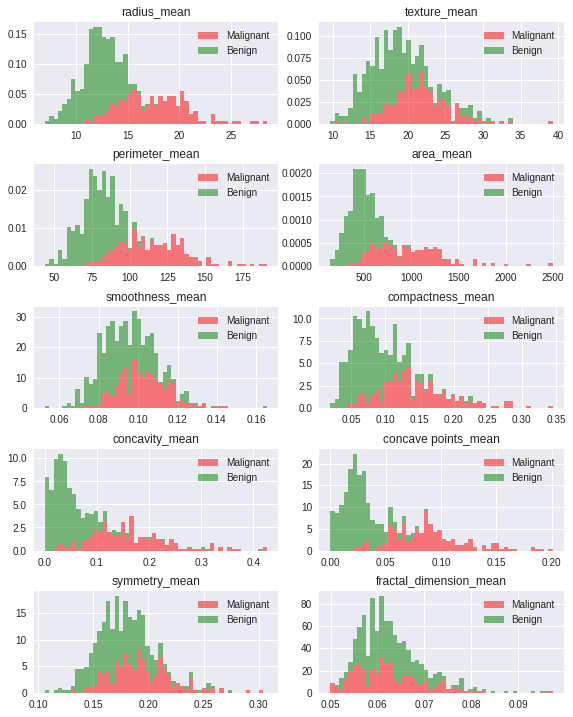

In [50]:
#Stack the data
plt.rcParams.update({'font.size': 8})
fig, axes = plt.subplots(5, 2, figsize=(8,10))
axes = axes.ravel()
for idx,ax in enumerate(axes):
    feature = features_mean[idx]
    maxx=max(df[feature])
    minn=min(df[feature])
    ax.figure
    binwidth= (maxx - minn)/50
    bins= np.arange(minn, maxx + binwidth, binwidth)
    ax.hist([dfM[feature],dfB[feature]], bins=bins , alpha=0.5,stacked=True,\
            normed = True, label=['Malignant','Benign'],color=['r','g'])
    ax.legend(loc='upper right')
    ax.set_title(feature)
    ax.grid(True)
plt.tight_layout()

plt.show()

If we examine all ten histograms we can realize that there might be a relationship between diagnosis and:
- radius
- perimeter
- area
- concavity
- concave point

So now let's prepare the data for the learning algorithm and see what happens.


We start by considering logistic regression. First we will only use the features highlighted before, then we will use only the mean measures and see how it goes.

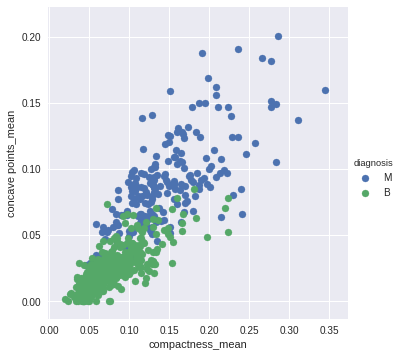

In [51]:
# let's now use seaborn to plot and compare 2 of the features of the dataset: compactness mean and concave point mean
# we pass the dataset, hue identifies which features to be based on (diagnosis) and select different colors 
#according to the value of this feature (so in this case 2 color)  
# then we map each point in a scatter plot where the x axis is compactness and the y axis is concave_point to see if there is
# a relation between this 2 features together and the diagnosis
sns.FacetGrid(df_All, hue="diagnosis", size=5).map(plt.scatter, 'compactness_mean', 'concave points_mean').add_legend()


As we can see there is a pretty close relation between the target and the 2 features: the higher the values the more probable the diagnosis is malignant and viceversa

But we can do more. We can examine one feature at the time with a box plot and see the different behavoiur.
For example let's examine the radius mean and see how the points are distributed according to the diagnosis

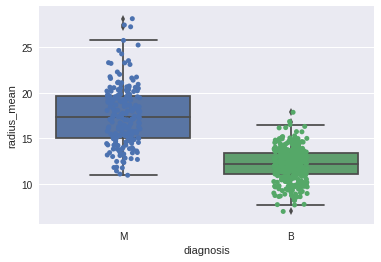

In [52]:
ax = sns.boxplot(x='diagnosis', y='radius_mean', data=df_All) #this is the normal boxplot
#this plots the points over the  boxplot
ax = sns.stripplot(x='diagnosis', y='radius_mean', data=df_All, jitter=True, edgecolor='gray') 


As we can see usually the radius_mean is bigger for malignant tumours (as we might expect) even tough there is a big variance around the average radius_mean (both malignant and benign)

Another useful seaborn plot is pairplot, which allows us to show the bivariate relation between any 2 features.

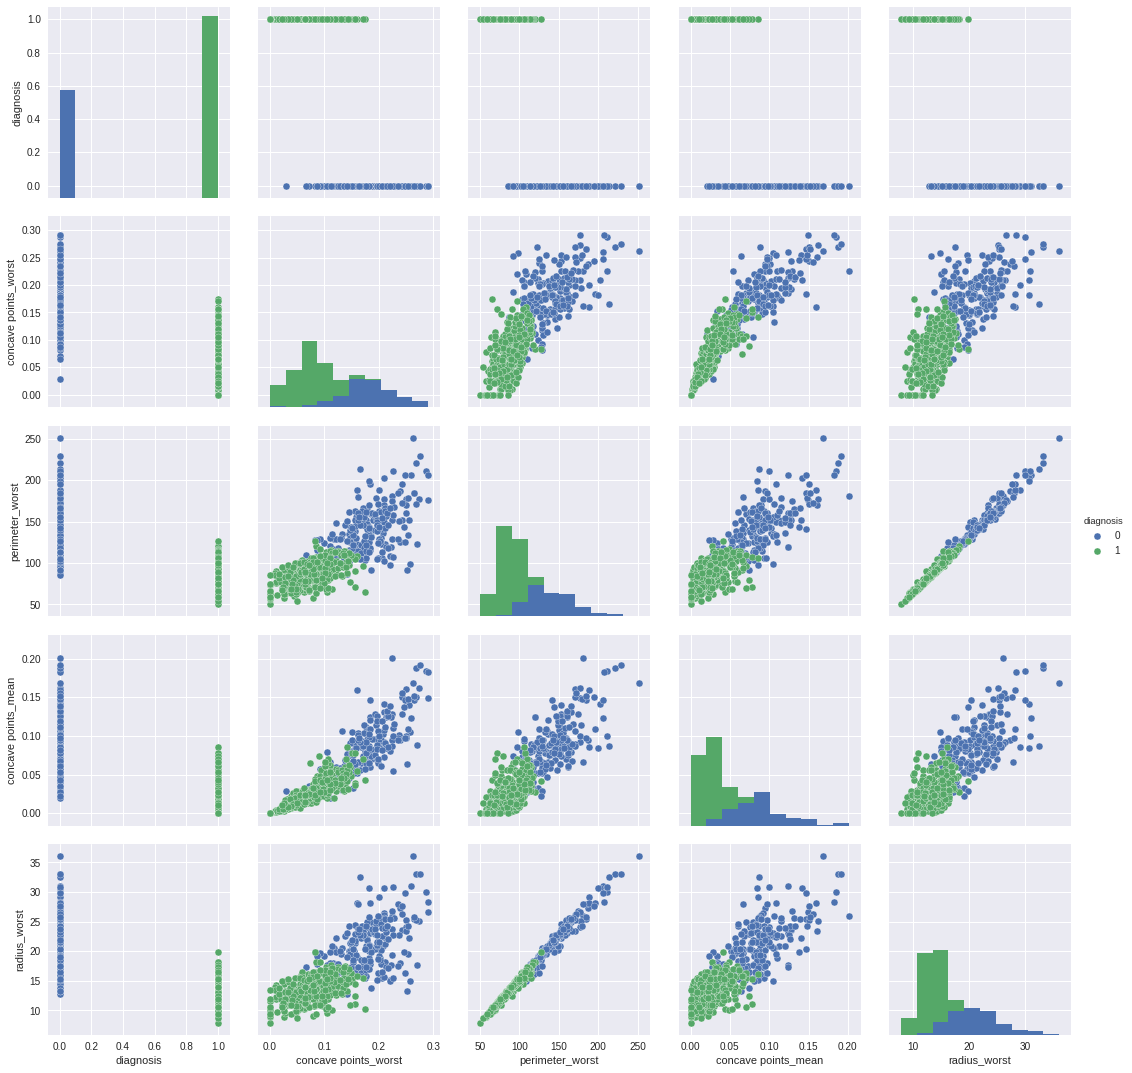

In [53]:
#First we select the features to compare, for n feature we have n*n different plots so we just select 
#the 4 features with higher correlation with diagnosis
feats = list(high_cor.index)[0:5]
sns.pairplot(df[feats], hue='diagnosis', size=3)

The diagonal elements show the histograms by default of the feature considered but we can use the agument **diag_kind=** to specify a different plot

If we examine the various results we realize that given the features with highest correlation the points are pretty much separated. We conclude that big values of those features give a significant probability of having malignant tumours.
An obvious observation is also that radius and perimeter are directly proportional features(it's almost a straight line)

Let's now begin with training a model using the dataset

In [54]:
#to begin we split dataframe in train and test set

train, test = train_test_split(df, test_size=0.3)

In [55]:
train.shape, test.shape

((398, 31), (171, 31))

In [56]:
#a general function to classify
def classifier(model, data, predictors, outcome):
    X = data[predictors] 
    y = data[outcome]
    #fit data
    model.fit(X,y)

    #make prediction on training set
    pred = model.predict(X)

    #Print accuracy
    accuracy = metrics.accuracy_score(pred,y)
    print("Accuracy : {0:.3%}".format(accuracy))

    #Perform k-fold cross-validation with 5 folds
    kf = KFold(n_splits=5)
    error = []
    id = 1
    for train, test in kf.split(data): #it splits data in train and test set selecting indices
        # Filter training data
        train_predictors = X.iloc[train,:]
    
        # The target we're using to train the algorithm.
        train_target = y.iloc[train]
    
        # Training the algorithm using the predictors and target.
        model.fit(train_predictors, train_target)
    
        #Record error from each cross-validation run
        error.append(model.score(X.iloc[test,:], y.iloc[test]))
    
        print("Cross-Validation Score mean : {0:.3%} %, after {1} iterations.".format(np.mean(error),id))
        id += 1


In [57]:
#prepare the model object
model=LogisticRegression()
features=list(high_cor.index)[1:11] #skip 0 cause is diagnosis
outcome='diagnosis'

classifier(model, train, features, outcome)

Accuracy : 94.724%
Cross-Validation Score mean : 90.000% %, after 1 iterations.
Cross-Validation Score mean : 93.125% %, after 2 iterations.
Cross-Validation Score mean : 93.750% %, after 3 iterations.
Cross-Validation Score mean : 94.047% %, after 4 iterations.
Cross-Validation Score mean : 94.478% %, after 5 iterations.


In [58]:
#let's try exactly the same but with less features
model=LogisticRegression()
features=list(high_cor.index)[1:6] #skip 0 cause is diagnosis
outcome='diagnosis'

classifier(model, train, features, outcome)


Accuracy : 92.714%
Cross-Validation Score mean : 90.000% %, after 1 iterations.
Cross-Validation Score mean : 90.625% %, after 2 iterations.
Cross-Validation Score mean : 90.833% %, after 3 iterations.
Cross-Validation Score mean : 90.593% %, after 4 iterations.
Cross-Validation Score mean : 91.715% %, after 5 iterations.


In [59]:
#and now with more features
model=LogisticRegression()
features=list(high_cor.index)[1:15] #skip 0 cause is diagnosis
outcome='diagnosis'

classifier(model, train, features, outcome)

Accuracy : 94.724%
Cross-Validation Score mean : 91.250% %, after 1 iterations.
Cross-Validation Score mean : 93.750% %, after 2 iterations.
Cross-Validation Score mean : 94.167% %, after 3 iterations.
Cross-Validation Score mean : 94.043% %, after 4 iterations.
Cross-Validation Score mean : 94.222% %, after 5 iterations.


In [60]:
#how about considering the whole dataset
model=LogisticRegression()
features=list(high_cor.index)[1:] #skip 0 cause is diagnosis
outcome='diagnosis'

classifier(model, train, features, outcome)

Accuracy : 95.477%
Cross-Validation Score mean : 90.000% %, after 1 iterations.
Cross-Validation Score mean : 92.500% %, after 2 iterations.
Cross-Validation Score mean : 93.750% %, after 3 iterations.
Cross-Validation Score mean : 94.363% %, after 4 iterations.
Cross-Validation Score mean : 94.984% %, after 5 iterations.


Interestingly, increasing the number of features does not give a better result on cross-validation, so we conclude that keeping the 10 features with highest correlation is enough to have a decent result

In [61]:
#Let's consider all the mean features

classifier(model, train, features_mean, outcome)

Accuracy : 90.704%
Cross-Validation Score mean : 80.000% %, after 1 iterations.
Cross-Validation Score mean : 86.250% %, after 2 iterations.
Cross-Validation Score mean : 88.750% %, after 3 iterations.
Cross-Validation Score mean : 89.347% %, after 4 iterations.
Cross-Validation Score mean : 90.212% %, after 5 iterations.


We now try our trained model on the test set (the one we split at the beginning)

In [62]:
#this is the model we chose based on the cross-validation results
model=LogisticRegression()
features=list(high_cor.index)[1:11] #skip 0 cause is diagnosis
target='diagnosis'
iters=100
#we perform 5 iterations with different test and train sets and we give the average score which should be close to the
#cross-validation process above

def calculate_score(iterations, features, outcome):
    scores = []
    for i in range (iterations):
        train,test = train_test_split(df, test_size=0.3)
        X = train[features]
        y = train[outcome]
        X_test = test[features]
        y_test = test[outcome]
        model.fit(X,y)
        model.predict(X) #this returns the vector of predicted output according to the trained model
        scores.append(model.score(X=X_test,y=y_test))
    return scores
value = np.mean(calculate_score(iters, features, target))
"Average score: {0:.3%} %".format(value)


'Average score: 94.713% %'

# Decision trees

We do the same as before using decision tree model

In [63]:
#First the 5 features
model=DecisionTreeClassifier()
features=['radius_mean','perimeter_mean','area_mean','concavity_mean','concave points_mean']

classifier(model, train, features, outcome)


Accuracy : 100.000%
Cross-Validation Score mean : 81.250% %, after 1 iterations.
Cross-Validation Score mean : 84.375% %, after 2 iterations.
Cross-Validation Score mean : 87.083% %, after 3 iterations.
Cross-Validation Score mean : 86.831% %, after 4 iterations.
Cross-Validation Score mean : 86.174% %, after 5 iterations.


Wow big accuracy, but that's probably because we are overfitting. In fact Cross-Validation is bad

In [64]:
#all mean features
features=list(df.columns)[2:12]

classifier(model, train, features, outcome)


Accuracy : 100.000%
Cross-Validation Score mean : 85.000% %, after 1 iterations.
Cross-Validation Score mean : 87.500% %, after 2 iterations.
Cross-Validation Score mean : 88.750% %, after 3 iterations.
Cross-Validation Score mean : 89.031% %, after 4 iterations.
Cross-Validation Score mean : 89.453% %, after 5 iterations.


In [65]:
#now the 10 features with higher correlation as before
features=list(high_cor.index)[1:11] #skip 0 cause is diagnosis

classifier(model, train, features, outcome)

Accuracy : 100.000%
Cross-Validation Score mean : 90.000% %, after 1 iterations.
Cross-Validation Score mean : 92.500% %, after 2 iterations.
Cross-Validation Score mean : 93.333% %, after 3 iterations.
Cross-Validation Score mean : 92.468% %, after 4 iterations.
Cross-Validation Score mean : 93.215% %, after 5 iterations.


In [66]:
#As usual we now try the whole dataset
features=list(high_cor.index)[1:]
classifier(model, train, features, outcome)

Accuracy : 100.000%
Cross-Validation Score mean : 86.250% %, after 1 iterations.
Cross-Validation Score mean : 89.375% %, after 2 iterations.
Cross-Validation Score mean : 90.833% %, after 3 iterations.
Cross-Validation Score mean : 90.593% %, after 4 iterations.
Cross-Validation Score mean : 91.462% %, after 5 iterations.


# Random forest

In [67]:
# whole dataset
clf = RandomForestClassifier(n_jobs=2)
classifier(clf, train, features, outcome)

Accuracy : 99.497%
Cross-Validation Score mean : 91.250% %, after 1 iterations.
Cross-Validation Score mean : 93.125% %, after 2 iterations.
Cross-Validation Score mean : 93.333% %, after 3 iterations.
Cross-Validation Score mean : 94.684% %, after 4 iterations.
Cross-Validation Score mean : 95.494% %, after 5 iterations.


In [68]:
# the 10 highest corr features
features=list(high_cor.index)[1:11] #skip 0 cause is diagnosis
classifier(clf, train, features, outcome)

Accuracy : 99.246%
Cross-Validation Score mean : 88.750% %, after 1 iterations.
Cross-Validation Score mean : 91.875% %, after 2 iterations.
Cross-Validation Score mean : 93.333% %, after 3 iterations.
Cross-Validation Score mean : 94.367% %, after 4 iterations.
Cross-Validation Score mean : 94.987% %, after 5 iterations.


In [69]:
# only mean features
features=list(df.columns)[2:12]
classifier(clf, train, features, outcome)

Accuracy : 99.749%
Cross-Validation Score mean : 83.750% %, after 1 iterations.
Cross-Validation Score mean : 87.500% %, after 2 iterations.
Cross-Validation Score mean : 88.750% %, after 3 iterations.
Cross-Validation Score mean : 89.031% %, after 4 iterations.
Cross-Validation Score mean : 89.706% %, after 5 iterations.
